# Task 1: Classification

- Create a Neural Network model
- Define optimization procedure
- Train Classifier
- Evaluate model on test set

## Dataset

In [1]:
!nvidia-smi

Tue Jun 14 13:23:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
USE_GPU = 0

In [3]:
# Import TensorFlow 
import tensorflow as tf

# Print the installed TensorFlow version
print(f'TensorFlow version: {tf.__version__}\n')

# Get all GPU devices on this server
gpu_devices = tf.config.list_physical_devices('GPU')

# Print the name and the type of all GPU devices
print('Available GPU Devices:')
for gpu in gpu_devices:
    print(' ', gpu.name, gpu.device_type)
    
# Set only the GPU specified as USE_GPU to be visible
tf.config.set_visible_devices(gpu_devices[USE_GPU], 'GPU')

# Get all visible GPU  devices on this server
visible_devices = tf.config.get_visible_devices('GPU')

# Print the name and the type of all visible GPU devices
print('\nVisible GPU Devices:')
for gpu in visible_devices:
    print(' ', gpu.name, gpu.device_type)
    
# Set the visible device(s) to not allocate all available memory at once,
# but rather let the memory grow whenever needed
for gpu in visible_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

TensorFlow version: 2.8.2

Available GPU Devices:
  /physical_device:GPU:0 GPU

Visible GPU Devices:
  /physical_device:GPU:0 GPU


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
# Add color channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [6]:
# Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
from sklearn.model_selection import train_test_split

# Get training and validation data
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.1)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

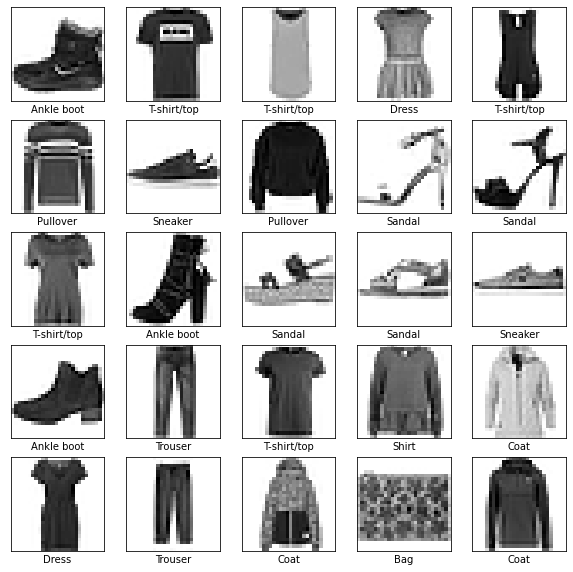

In [9]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i, :, :, 0], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
X_train[0].shape

(28, 28, 1)

In [11]:
input = tf.keras.Input(shape=(28, 28, 1))
X = tf.keras.layers.Conv2D(16, (3,3), strides=(2,2), padding='same')(input)
X = tf.keras.layers.Dropout(0.5)(X)
# X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.MaxPool2D((2,2), padding='same')(X)

X = tf.keras.layers.Conv2D(32, (3,3), strides=(2,2), padding='same')(X)
X = tf.keras.layers.Dropout(0.5)(X)
# X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.MaxPool2D((2,2), padding='same')(X)

X = tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding='same')(X)
X = tf.keras.layers.Dropout(0.5)(X)
# X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.MaxPool2D((2,2), padding='same')(X)

X = tf.keras.layers.Flatten()(X)
# X = tf.keras.layers.Dense(100, activation="relu")(X)
X = tf.keras.layers.Dense(64, activation="relu")(X)
X = tf.keras.layers.Dense(10, activation="softmax")(X)
model = tf.keras.Model(input, X)

In [12]:
# Decay learning rate according to #epoch
def scheduler(epoch, lr=0.01):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [13]:
# Monitor the validation loss and schedule lr automatically
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5), 
                    tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val,y_val), callbacks=callbacks)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
6750/6750 [==============================] - 33s 4ms/step - loss: 0.8440 - accuracy: 0.6818 - val_loss: 0.6671 - val_accuracy: 0.7463 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
6750/6750 [==============================] - 22s 3ms/step - loss: 0.6756 - accuracy: 0.7439 - val_loss: 0.6659 - val_accuracy: 0.7608 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
6750/6750 [==============================] - 22s 3ms/step - loss: 0.6455 - accuracy: 0.7587 - val_loss: 0.6133 - val_accuracy: 0.7728 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
6750/6750 [==============================] - 23s 3ms/step - loss: 0.6261 - accuracy: 0.7665 - val_loss: 0.5809 - val_accuracy: 0.7805 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning

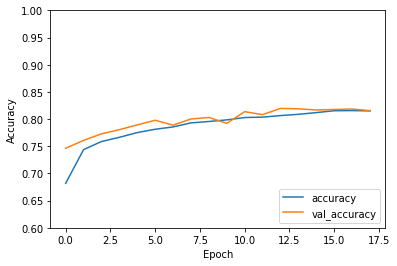

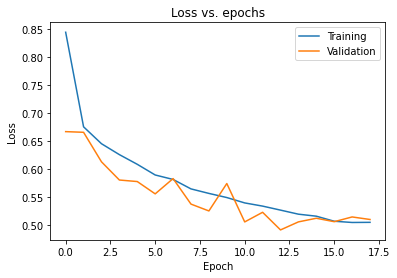

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5082 - accuracy: 0.8091 - 891ms/epoch - 3ms/step

Test accuracy: 0.8090999722480774


In [18]:
predictions = model.predict(test_images[:25])

In [19]:
import numpy as np

predicted_labels = np.array(class_names)[np.argmax(predictions, axis=-1)]

In [20]:
print(predicted_labels)

['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat'
 'Shirt' 'Sneaker' 'Sneaker' 'Coat' 'Sneaker' 'Bag' 'Dress' 'Coat'
 'Trouser' 'Pullover' 'Shirt' 'Bag' 'T-shirt/top' 'Pullover' 'Sneaker'
 'Sneaker' 'Ankle boot' 'Trouser']


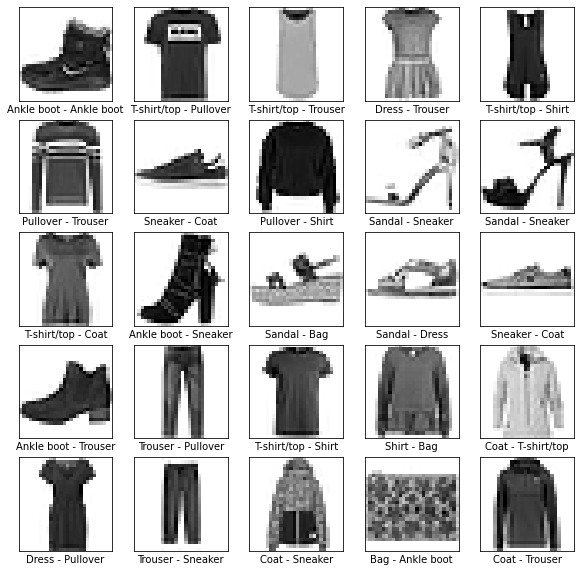

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i, :, :, 0], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]] + " - " + predicted_labels[i])
plt.show()

# Task 2: Train Autoencoder
- Create a Neural Network model
- Define optimization procedure
- Train Classifier
- Evaluate model on test set

In [22]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [23]:
def addGaussianNoise(mean=0.0, dev=1.0):
  gaussian_noise = mean + dev * np.random.rand(28, 28, 1)
  return gaussian_noise

In [24]:
gaussian_noise = addGaussianNoise(dev=50)

In [25]:
train_image = train_images.copy() + gaussian_noise
test_image = test_images.copy() + gaussian_noise

In [26]:
train_image = train_image / 255.0
test_image = test_image / 255.0

train_images = train_images / 255.0
test_images = test_images / 255.0

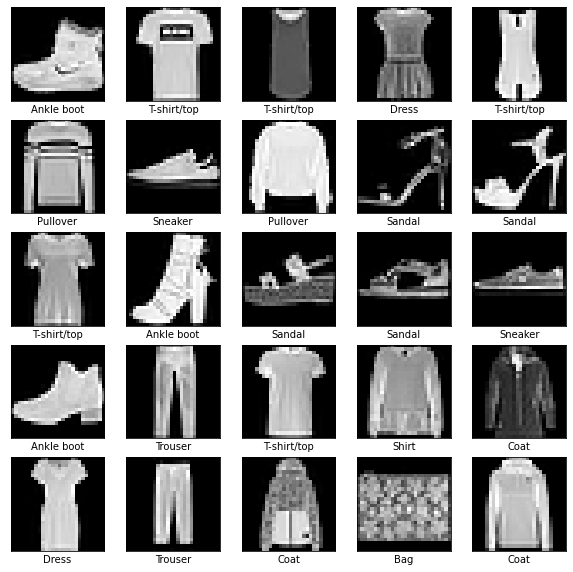

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i, :, :, 0], cmap=plt.cm.gray)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

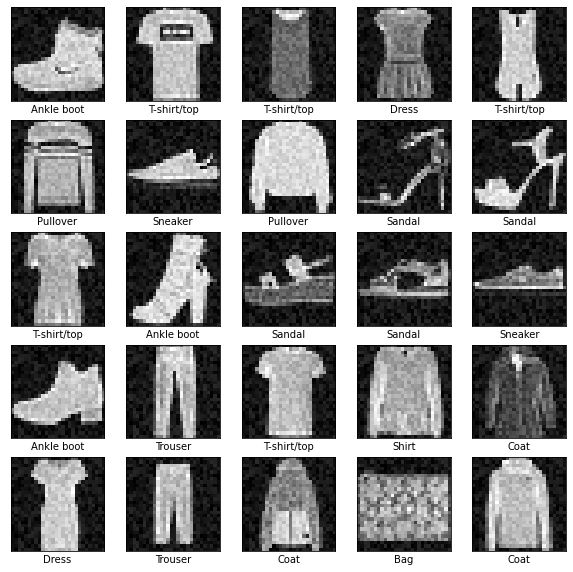

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i, :, :, 0], cmap=plt.cm.gray)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [29]:
input_img = tf.keras.Input(shape=(28, 28, 1))  

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(filters = 8, kernel_size=(3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), padding='same')(x)

x = tf.keras.layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)

x = tf.keras.layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)

decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [30]:
autoencoder = tf.keras.Model(input_img, decoded)

In [31]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 8)         584       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                       

In [32]:
autoencoder.compile(optimizer='adam', loss='mse')

In [33]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2), 
                    tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]

In [34]:
history = autoencoder.fit(train_image, train_image,
                epochs=50,
                batch_size=8,
                shuffle=True,
                validation_data=(test_image, test_image),callbacks=callbacks
               )


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
7500/7500 [==============================] - 32s 4ms/step - loss: 0.0146 - val_loss: 0.0110 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
7500/7500 [==============================] - 31s 4ms/step - loss: 0.0101 - val_loss: 0.0095 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
7500/7500 [==============================] - 30s 4ms/step - loss: 0.0091 - val_loss: 0.0089 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
7500/7500 [==============================] - 31s 4ms/step - loss: 0.0086 - val_loss: 0.0084 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/50
7500/7500 [==============================] - 31s 4ms/step - loss: 0.0083 - val_loss: 0.0081 - lr: 0.0010

Epoch 6: LearningRa

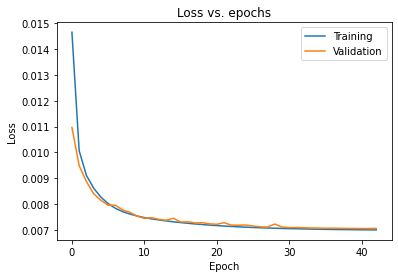

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

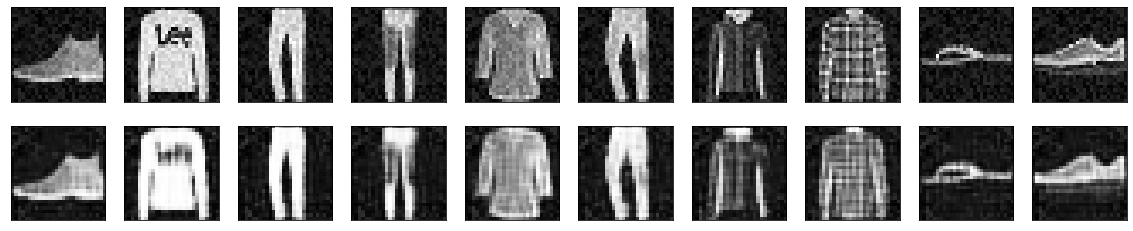

In [36]:
decoded_imgs = autoencoder.predict(test_image)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()